<a href="https://colab.research.google.com/github/yfhkucing/RandomForestBMS/blob/master/DataBMS_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np


In [72]:
df = pd.read_excel('Koordinat dan Input Skenario.xlsx',sheet_name='InputSkenario')

In [73]:
df.head()

,Jendela,AC,Fan,Jam,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
0,0,0,0.0,9,171,0.5,27.0
1,0,0,0.0,12,153,0.4,31.5
2,0,0,0.0,15,47,4.8,33.1
3,0,0,0.0,9,62,4.1,27.4
4,0,0,0.0,12,341,3.8,30.6


In [74]:
df.columns

Index(['Jendela', 'AC', 'Fan', 'Jam', 'Arah Sudut Kecepatan Angin derajat',
       'Nilai Kecepatan Angin', 'Dry Bulb Temperature'],
      dtype='object')

In [75]:
df.describe()

,Jendela,AC,Fan,Jam,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,12.000000,180.333333,1.883333,29.691667
std,0.501307,0.501307,0.374406,2.455894,97.809588,1.911479,2.035274
min,0.000000,0.000000,0.000000,9.000000,47.000000,0.100000,26.700000
25%,0.000000,0.000000,0.247500,9.000000,95.500000,0.375000,27.925000
50%,0.500000,0.500000,0.500000,12.000000,167.000000,0.950000,29.850000
75%,1.000000,1.000000,0.752500,15.000000,251.500000,3.875000,31.400000
max,1.000000,1.000000,1.000000,15.000000,341.000000,5.300000,33.100000


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Jendela                             192 non-null    int64  
 1   AC                                  192 non-null    int64  
 2   Fan                                 192 non-null    float64
 3   Jam                                 192 non-null    int64  
 4   Arah Sudut Kecepatan Angin derajat  192 non-null    int64  
 5   Nilai Kecepatan Angin               192 non-null    float64
 6   Dry Bulb Temperature                192 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 10.6 KB


In [77]:
df = df.drop('Jam', axis=1)

In [78]:
df.head()

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
0,0,0,0.0,171,0.5,27.0
1,0,0,0.0,153,0.4,31.5
2,0,0,0.0,47,4.8,33.1
3,0,0,0.0,62,4.1,27.4
4,0,0,0.0,341,3.8,30.6


In [79]:
one_hot_fan = pd.get_dummies(df['Fan'])

In [80]:
one_hot_fan.head()

,0.00,0.33,0.67,1.00
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [81]:
one_hot_fan.columns

Float64Index([0.0, 0.33, 0.67, 1.0], dtype='float64')

In [82]:
one_hot_fan.rename(columns={0.0: 'Fan_0', 0.33: 'Fan_0.33', 0.67:'Fan_0.67',1:'Fan_1'}, inplace=True)

In [83]:
one_hot_fan.head()

,Fan_0,Fan_0.33,Fan_0.67,Fan_1
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [84]:
df = df.drop('Fan', axis=1)

In [85]:
df.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
0,0,0,171,0.5,27.0
1,0,0,153,0.4,31.5
2,0,0,47,4.8,33.1
3,0,0,62,4.1,27.4
4,0,0,341,3.8,30.6


In [86]:
df = df.join(one_hot_fan)

In [87]:
df.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan_0,Fan_0.33,Fan_0.67,Fan_1
0,0,0,171,0.5,27.0,1,0,0,0
1,0,0,153,0.4,31.5,1,0,0,0
2,0,0,47,4.8,33.1,1,0,0,0
3,0,0,62,4.1,27.4,1,0,0,0
4,0,0,341,3.8,30.6,1,0,0,0


In [88]:
df.rename(columns={'AC': 'ac', 'Jendela': 'window', 'Arah Sudut Kecepatan Angin derajat':'wind_direction','Nilai Kecepatan Angin':'wind_velocity', 'Dry Bulb Temperature': 'dry_bulb_temp'}, inplace=True)

In [89]:
df.head()

,window,ac,wind_direction,wind_velocity,dry_bulb_temp,Fan_0,Fan_0.33,Fan_0.67,Fan_1
0,0,0,171,0.5,27.0,1,0,0,0
1,0,0,153,0.4,31.5,1,0,0,0
2,0,0,47,4.8,33.1,1,0,0,0
3,0,0,62,4.1,27.4,1,0,0,0
4,0,0,341,3.8,30.6,1,0,0,0


In [90]:
x = df[['wind_direction', 'wind_velocity', 'dry_bulb_temp']]
y = df[['window', 'ac', 'Fan_0', 'Fan_0.33', 'Fan_0.67', 'Fan_1']]

In [91]:
x.head()

,wind_direction,wind_velocity,dry_bulb_temp
0,171,0.5,27.0
1,153,0.4,31.5
2,47,4.8,33.1
3,62,4.1,27.4
4,341,3.8,30.6


In [92]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wind_direction  192 non-null    int64  
 1   wind_velocity   192 non-null    float64
 2   dry_bulb_temp   192 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.6 KB


In [93]:
y.head()

,window,ac,Fan_0,Fan_0.33,Fan_0.67,Fan_1
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [94]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   window    192 non-null    int64
 1   ac        192 non-null    int64
 2   Fan_0     192 non-null    uint8
 3   Fan_0.33  192 non-null    uint8
 4   Fan_0.67  192 non-null    uint8
 5   Fan_1     192 non-null    uint8
dtypes: int64(2), uint8(4)
memory usage: 3.9 KB


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [96]:
train_X, test_X, train_Y, test_Y = train_test_split(x, y, test_size=0.2, shuffle=False)

In [97]:
train_X.head()

,wind_direction,wind_velocity,dry_bulb_temp
0,171,0.5,27.0
1,153,0.4,31.5
2,47,4.8,33.1
3,62,4.1,27.4
4,341,3.8,30.6


In [98]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wind_direction  153 non-null    int64  
 1   wind_velocity   153 non-null    float64
 2   dry_bulb_temp   153 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [135]:
train_Y[train_Y['Fan_0.33'] == 1].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 12 to 119
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   window    36 non-null     int64
 1   ac        36 non-null     int64
 2   Fan_0     36 non-null     uint8
 3   Fan_0.33  36 non-null     uint8
 4   Fan_0.67  36 non-null     uint8
 5   Fan_1     36 non-null     uint8
dtypes: int64(2), uint8(4)
memory usage: 1008.0 bytes


In [100]:
train_Y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   window    153 non-null    int64
 1   ac        153 non-null    int64
 2   Fan_0     153 non-null    uint8
 3   Fan_0.33  153 non-null    uint8
 4   Fan_0.67  153 non-null    uint8
 5   Fan_1     153 non-null    uint8
dtypes: int64(2), uint8(4)
memory usage: 4.2 KB


In [121]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(150, 100, 50), activation='relu', solver='adam', max_iter=300)

In [122]:
mlp_classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (150, 100, 50),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [123]:
mlp_classifier.fit(train_X, train_Y)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [124]:
y_pred = mlp_classifier.predict(test_X)

In [115]:
from sklearn.metrics import accuracy_score

In [125]:
accuracy_score(test_Y, y_pred)

0.0

In [16]:
#dataframe 


new_header = df.iloc[0] #grab the first row for the header
#df = df[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header
df.columns = df.columns.fillna('to_drop')
#df.drop('to_drop', axis = 1, inplace = True)
#df.drop('Skenario Lama', axis = 1, inplace = True)
#df.drop('PIC', axis = 1, inplace = True)
#df.drop('Iterasi', axis = 1, inplace = True)
#df.drop('Tanggal', axis = 1, inplace = True)
df.drop('Jam', axis = 1, inplace = True)
df

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
0,0,0,0.0,171,0.5,27.0
1,0,0,0.0,153,0.4,31.5
2,0,0,0.0,47,4.8,33.1
3,0,0,0.0,62,4.1,27.4
4,0,0,0.0,341,3.8,30.6
...,...,...,...,...,...,...
187,1,1,1.0,163,0.9,31.4
188,1,1,1.0,210,0.1,31.3
189,1,1,1.0,247,0.3,26.7
190,1,1,1.0,265,1.0,28.1


In [3]:
df.describe()

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,180.333333,1.883333,29.691667
std,0.501307,0.501307,0.374406,97.809588,1.911479,2.035274
min,0.000000,0.000000,0.000000,47.000000,0.100000,26.700000
25%,0.000000,0.000000,0.247500,95.500000,0.375000,27.925000
50%,0.500000,0.500000,0.500000,167.000000,0.950000,29.850000
75%,1.000000,1.000000,0.752500,251.500000,3.875000,31.400000
max,1.000000,1.000000,1.000000,341.000000,5.300000,33.100000


In [4]:
df.dtypes
df['AC'].value_counts()

0    96
1    96
Name: AC, dtype: int64

In [5]:
#replacing fan value

dictFan = {0:'0',0.33:'1',0.67:'2',1:'3'}
df.replace({"Fan":dictFan},inplace=True)
df.describe(include="all")

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
count,192.000000,192.000000,192,192.000000,192.000000,192.000000
unique,NaN,NaN,4,NaN,NaN,NaN
top,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,NaN,48,NaN,NaN,NaN
mean,0.500000,0.500000,NaN,180.333333,1.883333,29.691667
std,0.501307,0.501307,NaN,97.809588,1.911479,2.035274
min,0.000000,0.000000,NaN,47.000000,0.100000,26.700000
25%,0.000000,0.000000,NaN,95.500000,0.375000,27.925000
50%,0.500000,0.500000,NaN,167.000000,0.950000,29.850000
75%,1.000000,1.000000,NaN,251.500000,3.875000,31.400000


In [6]:
#one hot encoding fan data
# Get one hot encoding of columns B
one_hot_fan = pd.get_dummies(df['Fan'])
# Drop column B as it is now encoded
df = df.drop('Fan',axis = 1)
# Join the encoded df
df = df.join(one_hot_fan)
df.rename(columns={'0': 'Fan 0', '1': 'Fan 0.33','2':'Fan 0.67','3':'Fan 1'}, inplace=True)
df

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 0,Fan 0.33,Fan 0.67,Fan 1
0,0,0,171,0.5,27.0,1,0,0,0
1,0,0,153,0.4,31.5,1,0,0,0
2,0,0,47,4.8,33.1,1,0,0,0
3,0,0,62,4.1,27.4,1,0,0,0
4,0,0,341,3.8,30.6,1,0,0,0
...,...,...,...,...,...,...,...,...,...
187,1,1,163,0.9,31.4,0,0,0,1
188,1,1,210,0.1,31.3,0,0,0,1
189,1,1,247,0.3,26.7,0,0,0,1
190,1,1,265,1.0,28.1,0,0,0,1


In [7]:
print(df['Fan 0'].value_counts())
print(df['Fan 0.33'].value_counts())
print(df['Fan 0.67'].value_counts())
print(df['Fan 1'].value_counts())

0    144
1     48
Name: Fan 0, dtype: int64
0    144
1     48
Name: Fan 0.33, dtype: int64
0    144
1     48
Name: Fan 0.67, dtype: int64
0    144
1     48
Name: Fan 1, dtype: int64


In [14]:
#normalizing data
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.head()

,Jendela,AC,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature,Fan 0,Fan 0.33,Fan 0.67,Fan 1
0,0.0,0.0,0.421769,0.076923,0.046875,1.0,0.0,0.0,0.0
1,0.0,0.0,0.360544,0.057692,0.750000,1.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.903846,1.000000,1.0,0.0,0.0,0.0
3,0.0,0.0,0.051020,0.769231,0.109375,1.0,0.0,0.0,0.0
4,0.0,0.0,1.000000,0.711538,0.609375,1.0,0.0,0.0,0.0


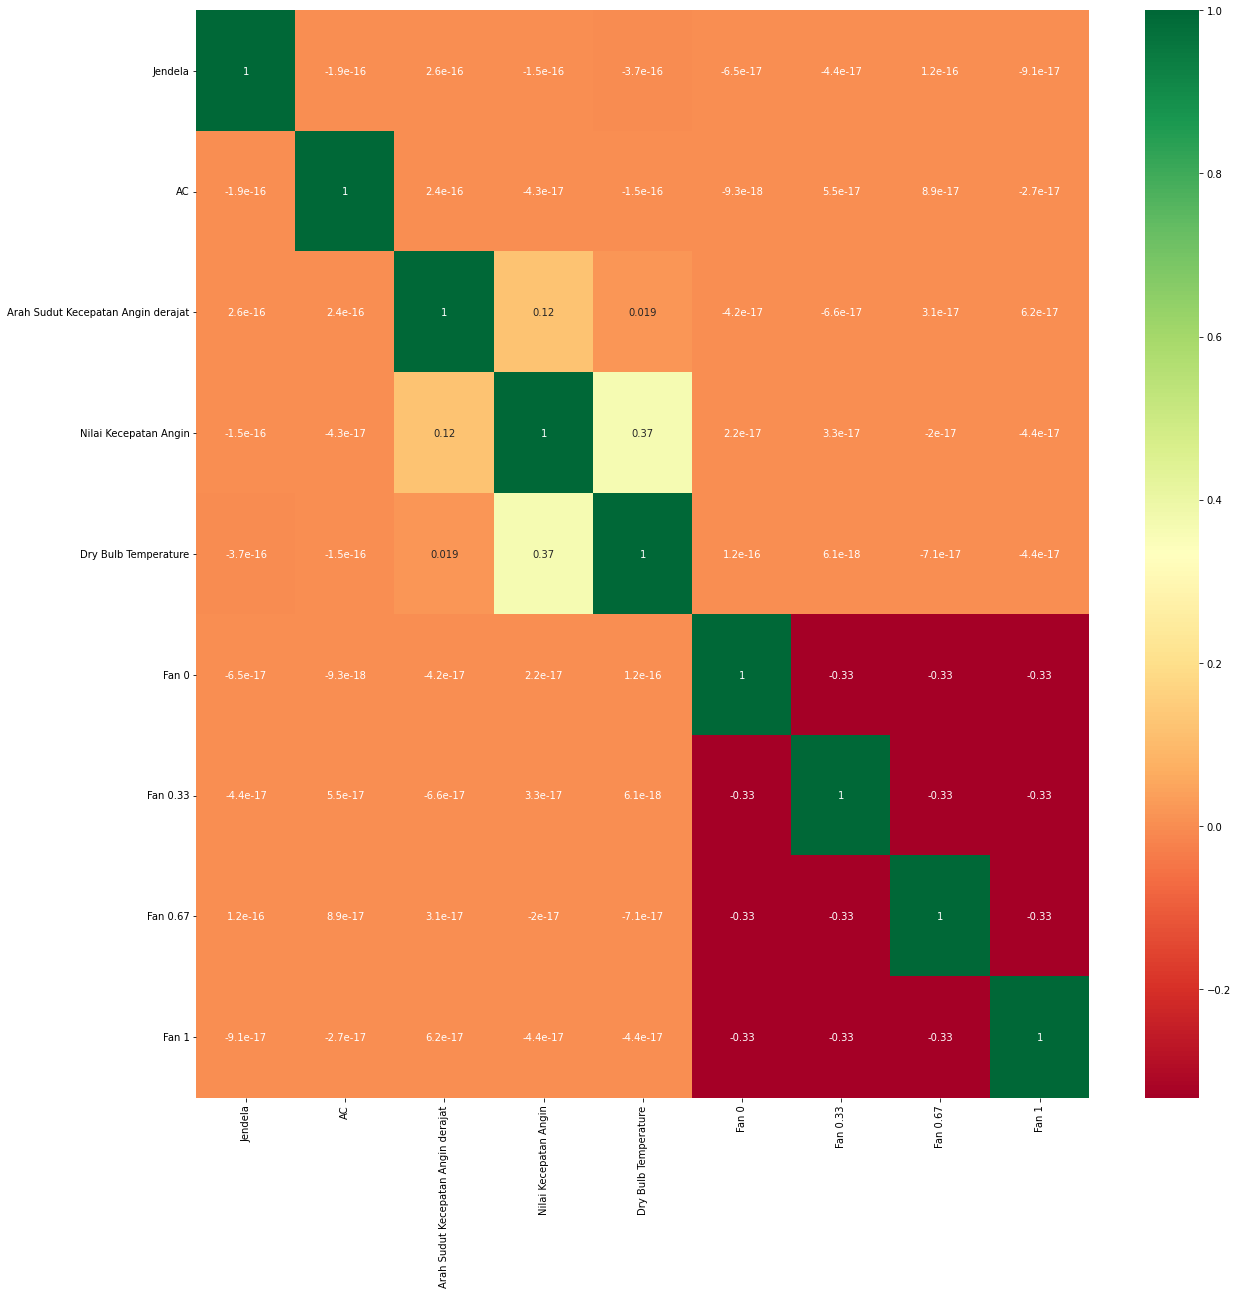

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation

corrmat = normalized_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(normalized_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
#data Xn and Yn

import numpy as np

Xn = normalized_df.drop(['Jendela','AC','Fan 0','Fan 0.33','Fan 0.67','Fan 1'], axis=1)
Yn = normalized_df.drop(['Arah Sudut Kecepatan Angin derajat',
                         'Nilai Kecepatan Angin',
                         'Dry Bulb Temperature'], axis=1)

In [13]:
#splitting data

from sklearn.model_selection import train_test_split
import numpy as np
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size=0.1, random_state=10)
Xn_train = np.array(Xn_train)
Xn_test = np.array(Xn_test)
Yn_train = np.array(Yn_train)
Yn_test = np.array(Yn_test)
print(Yn_test.shape)

(20, 6)


In [ ]:
#neural network
from sklearn.neural_ne

In [ ]:
#randomforest

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=100, random_state=10)
clf.fit(Xn_train, Yn_train)
Yn_pred = clf.predict(Xn_test)

In [ ]:
print(metrics.f1_score(Yn_test, Yn_pred, average=None))

[0.36363636 0.31578947 0.         0.         0.         0.        ]


In [ ]:
Yn_pred = clf.predict(Xn_test)
print(len(Yn_pred))
print(Yn_test)
print(Yn_pred)
for n in range(len(Yn_pred)):
  print(metrics.accuracy_score(Yn_test[n], Yn_pred[n]))

20
[[0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [1. 1. 0. 0. 1. 0.]
 [0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1.]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]]
0.5
0.6666666666666666
0.6666666666666666
0.5
0.6666666666666666
0.5
0.5
0.6666666666666666
0.6666666666666666
0.5
0.6666666666666666
0.6666666666666666
0.

In [ ]:
a = np.array([0.421769,0.076923,0.046875])
b = a.reshape(-1, 3)
print(b)
clf.predict(b)

[[0.421769 0.076923 0.046875]]


array([[0., 1., 0., 0., 0., 0.]])